In [1044]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1045]:
pd.set_option('display.max_columns',None)

In [1046]:
df  = pd.read_csv("gurgaon_properties_outlier_treated.csv")

In [1047]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score,area_room_ratio
0,sector 95,flat,the roselia 2,0.45,6475.0,695.0,Built Up area: 695 (64.57 sq.m.)Carpet area: 5...,2,2,2,19.0,North,Undefined,NaN,695.0,595.0,0,0,0,0,0,1,0,347.500000
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,8.0,Na,Moderately New Property,2250.0,NaN,1848.0,0,0,0,1,0,2,8,616.000000
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,2588.0,Super Built up area 2588(240.43 sq.m.)Built Up...,3,3,3+,8.0,East,Moderately New Property,2588.0,1900.0,NaN,1,0,0,0,0,1,23,862.666667
3,sector 108,flat,sobha city,3.35,13267.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,19.0,Na,New Property,2072.9,NaN,NaN,0,0,0,0,0,1,102,841.666667
4,sector 108,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,8.0,East,Relatively new property,1381.0,NaN,NaN,0,0,0,0,0,1,85,690.500000


In [1048]:
df.isnull().sum()

sector                    0
property_type             0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                    0
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
servant room              0
study room                0
others                    0
pooja room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## built_up_area

In [1050]:
plt.rcParams['figure.figsize'] = (6, 4)

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

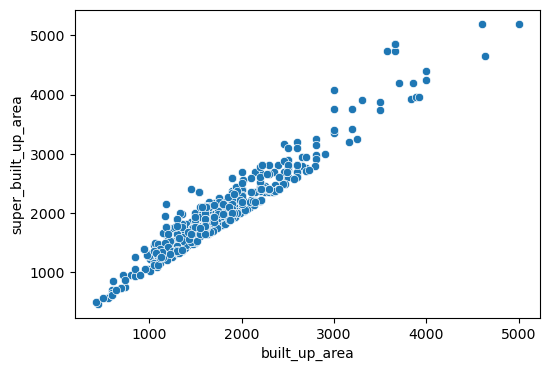

In [1051]:
sns.scatterplot(x=df["built_up_area"] , y = df["super_built_up_area"])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

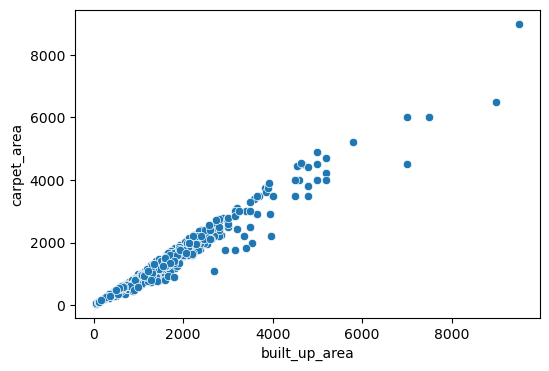

In [1052]:
sns.scatterplot(x=df["built_up_area"] , y = df["carpet_area"])

In [1053]:
df.shape

(3555, 24)

In [1054]:
# no single ro where the built_up_area , carpet_area, super_built_area all of this are Nan

df[(df["built_up_area"].isnull()) & (df["carpet_area"].isnull()) & (df["super_built_up_area"].isnull())].shape

(0, 24)

In [1055]:
all_sbc_present = df[~((df["built_up_area"].isnull()) | (df["carpet_area"].isnull()) | (df["super_built_up_area"].isnull()))]

In [1056]:
# super_to_built_up_ratio 
super_to_built_up_ratio = (all_sbc_present["super_built_up_area"] / all_sbc_present["built_up_area"]).median()

# carpet_to_built_up_ratio
carpet_to_built_up_ratio = (all_sbc_present["carpet_area"] / all_sbc_present["built_up_area"]).median()

print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [1057]:
# c and s present b is NaN 
sc_df = df[~(df["super_built_up_area"].isnull()) & ~(df["carpet_area"].isnull()) & (df["built_up_area"].isnull())]

In [1058]:
sc_df["built_up_area"].fillna(round(((df["super_built_up_area"]/1.105) + (df["carpet_area"]/0.9))/2) , inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\4005245601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sc_df["built_up_area"].fillna(round(((df["super_built_up_area"]/1.105) + (df["carpet_area"]/0.9))/2) , inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\4005245601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1059]:
df.update(sc_df)

In [1060]:
df.isnull().sum()

sector                    0
property_type             0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                    0
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
servant room              0
study room                0
others                    0
pooja room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [1061]:
# s is present c and b are NaN
s_df = df[~(df["super_built_up_area"].isnull()) & (df["carpet_area"].isnull()) & (df["built_up_area"].isnull())]

In [1062]:
s_df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score,area_room_ratio
3,sector 108,flat,sobha city,3.35,13267.0,2525.0,Super Built up area 2072.9(192.58 sq.m.),3,4,2,19.0,Na,New Property,2072.9,NaN,NaN,0,0,0,0,0,1,102,841.666667
4,sector 108,flat,sobha city,1.90,13758.0,1381.0,Super Built up area 1381(128.3 sq.m.),2,2,2,8.0,East,Relatively new property,1381.0,NaN,NaN,0,0,0,0,0,1,85,690.500000
6,sector 86,flat,dlf new town heights,1.40,5942.0,2356.0,Super Built up area 2356(218.88 sq.m.),4,4,3+,20.0,South-East,Relatively new property,2356.0,NaN,NaN,1,0,0,1,0,1,65,589.000000
8,sector 79,flat,godrej,1.29,8206.0,1572.0,Super Built up area 1572(146.04 sq.m.),2,2,3,4.0,Na,New Property,1572.0,NaN,NaN,0,0,0,0,0,1,0,786.000000
11,sector 95,flat,ramsons kshitij,0.22,6471.0,340.0,Super Built up area 340(31.59 sq.m.),1,1,1,2.0,Na,New Property,340.0,NaN,NaN,0,0,0,0,0,1,0,340.000000


In [1063]:
s_df["built_up_area"].fillna(round(df["super_built_up_area"]/1.105),inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\2512014920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s_df["built_up_area"].fillna(round(df["super_built_up_area"]/1.105),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\2512014920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df["built_up_area"].fillna(round(

In [1064]:
s_df.sample(5)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score,area_room_ratio
2232,sector 111,flat,puri diplomatic greens,2.65,11964.0,2215.0,Super Built up area 2215(205.78 sq.m.),3,4,3+,19.0,South-East,Relatively new property,2215.0,2005.0,NaN,1,1,0,1,1,1,65,738.333333
3402,sector 108,flat,sobha city,2.10,13972.0,1503.0,Super Built up area 1381(128.3 sq.m.),2,2,2,3.0,Na,Under Construction,1381.0,1250.0,NaN,0,0,0,0,0,1,74,751.500000
3311,sector 104,flat,ats triumph,2.00,8734.0,2290.0,Super Built up area 2290(212.75 sq.m.),3,4,3+,4.0,Na,Relatively new property,2290.0,2072.0,NaN,1,0,0,0,0,1,60,763.333333
886,sector 69,flat,tulip violet,1.46,9252.0,1578.0,Super Built up area 1578(146.6 sq.m.),3,3,2,0.0,North-East,Relatively new property,1578.0,1428.0,NaN,0,0,0,1,0,0,174,526.000000
2551,sector 82,flat,mapsko casa bella,1.30,6379.0,2038.0,Super Built up area 1960(182.09 sq.m.),4,4,3+,1.0,North,Relatively new property,1960.0,1774.0,NaN,1,0,0,0,0,1,130,509.500000


In [1065]:
df.update(s_df)

In [1066]:
df.isnull().sum()

sector                    0
property_type             0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                    0
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
servant room              0
study room                0
others                    0
pooja room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [1067]:
# c is present s and b are NaN

c_df = df[~(df["carpet_area"].isnull()) & (df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull())]

In [1068]:
c_df["built_up_area"].fillna(round(df["carpet_area"]/0.9),inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\2251512966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df["built_up_area"].fillna(round(df["carpet_area"]/0.9),inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\2251512966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df["built_up_area"].fillna(round(df["carp

In [1069]:
c_df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score,area_room_ratio
17,sector 61,flat,smart world orchard,2.55,15644.0,1630.0,Carpet area: 1630 (151.43 sq.m.),3,3,2,4.0,Na,New Property,NaN,1811.0,1630.0,0,0,1,0,0,1,30,543.333333
23,sector 4,flat,huda ashok vihar phase,0.43,6615.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,2.0,Na,Relatively new property,NaN,722.0,650.0,0,0,0,0,0,1,7,325.000000
26,sector 61,flat,smart world orchard,1.47,12783.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,4.0,North-East,New Property,NaN,1278.0,1150.0,0,1,0,1,0,1,53,575.000000
31,sector 28,flat,suncity platinum towers,6.00,22346.0,2685.0,Carpet area: 2685 (249.44 sq.m.),3,3,2,8.0,South-East,Moderately New Property,NaN,2983.0,2685.0,1,0,0,0,0,1,31,895.000000
36,gwal pahari,flat,nul,0.56,6054.0,925.0,Carpet area: 925 (85.94 sq.m.),2,2,1,11.0,Na,Old Property,NaN,1028.0,925.0,0,0,0,0,0,0,0,462.500000


In [1070]:
df.update(c_df)

In [1071]:
df.isnull().sum()

sector                    0
property_type             0
society                   1
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                    0
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
servant room              0
study room                0
others                    0
pooja room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [1072]:
df.shape

(3555, 24)

## built_up_area vs price

<Axes: xlabel='built_up_area', ylabel='price'>

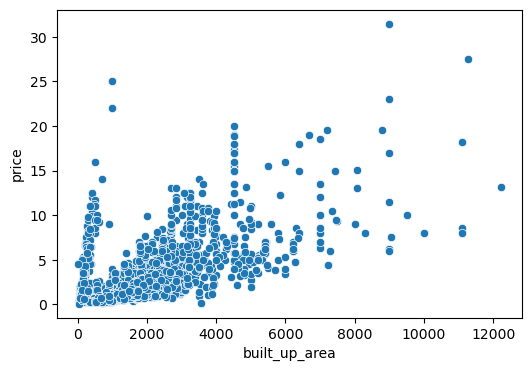

In [1074]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [1075]:
anamoly_df = df[(df["built_up_area"] < 2000) & (df["price"] > 2.5)][['price','area','built_up_area']]

In [1076]:
anamoly_df.shape

(275, 3)

In [1077]:
anamoly_df.sample(5)

,price,area,built_up_area
1613,2.80,1650.00,1493.0
1524,2.78,1829.00,1654.0
1925,2.70,2159.00,1954.0
1623,3.60,1728.03,1728.0
1670,22.00,8249.90,1000.0


In [1078]:
anamoly_df['built_up_area'] = anamoly_df['area']

<Axes: xlabel='built_up_area', ylabel='price'>

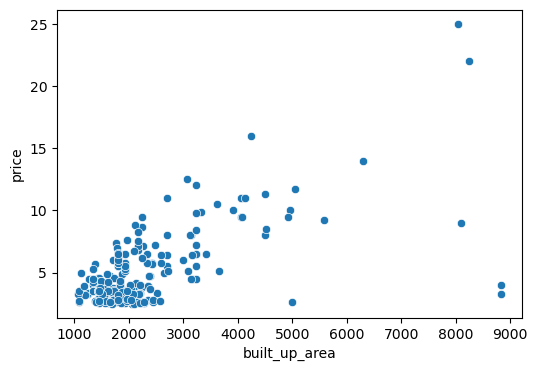

In [1079]:
sns.scatterplot(x=anamoly_df['built_up_area'],y=anamoly_df['price'])

In [1080]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

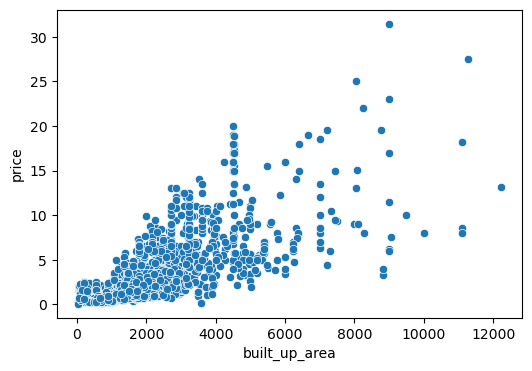

In [1081]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [1082]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [1083]:
df.head()

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,North,Undefined,695.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,Na,Moderately New Property,2045.0,0,0,0,1,0,2,8
2,manesar,flat,hsiidc sidco aravali,0.91,3516.0,3,3,3+,8.0,East,Moderately New Property,1900.0,1,0,0,0,0,1,23
3,sector 108,flat,sobha city,3.35,13267.0,3,4,2,19.0,Na,New Property,2525.0,0,0,0,0,0,1,102
4,sector 108,flat,sobha city,1.90,13758.0,2,2,2,8.0,East,Relatively new property,1250.0,0,0,0,0,0,1,85


In [1084]:
df.isnull().sum()

sector              0
property_type       0
society             1
price               0
price_per_sqft      0
bedRoom             0
bathroom            0
balcony             0
floorNum           17
facing              0
agePossession       0
built_up_area       0
servant room        0
study room          0
others              0
pooja room          0
store room          0
furnishing_type     0
luxury_score        0
dtype: int64

## floorNum

In [1086]:
df[df['floorNum'].isnull()]

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
269,sector 43,house,ansal sushant lok plots,3.30,26570.0,1,1,0,NaN,Na,Under Construction,1242.0,0,0,0,0,0,1,0
511,sector 78,flat,NaN,0.60,3692.0,2,2,0,NaN,Na,Under Construction,1625.0,0,0,0,0,0,1,0
827,sector 66,house,emaar mgf marbella,9.00,21251.0,4,4,3+,NaN,South-West,Relatively new property,5200.0,1,0,0,1,1,0,114
1059,sector 86,house,dlf new town heights,2.47,7718.0,4,4,3+,NaN,West,Moderately New Property,2800.0,1,0,0,1,0,0,130
1108,sector 7,house,independent,6.50,15046.0,3,2,3+,NaN,Na,Old Property,4320.0,0,0,0,0,0,1,9
1447,sector 3,house,independent,1.50,10288.0,3,3,0,NaN,Na,Old Property,210.0,0,0,0,0,0,1,0
1751,sector 26,house,independent,4.60,12198.0,4,4,3+,NaN,Na,Old Property,3771.0,0,0,0,0,0,1,28
1778,sector 48,house,vipul tatvam villa,8.50,26235.0,4,4,2,NaN,East,Moderately New Property,3240.0,1,0,0,1,1,1,88
2204,sector 12,house,jacob pura,0.35,9722.0,2,1,0,NaN,Na,Old Property,360.0,0,0,0,0,0,1,0
2400,sector 24,house,independent,1.45,2984.0,3,3,1,NaN,Na,Old Property,540.0,0,0,0,0,0,1,9


In [1087]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [1088]:
df['floorNum'].fillna(2.0,inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26232\2904365184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace = True)


In [1089]:
df.isnull().sum()

sector             0
property_type      0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
servant room       0
study room         0
others             0
pooja room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

## facing

In [1091]:
df["facing"] = df["facing"].replace("Na","NaN")

In [1092]:
df.isnull().sum()

sector             0
property_type      0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
facing             0
agePossession      0
built_up_area      0
servant room       0
study room         0
others             0
pooja room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [1093]:
df[df["facing"] == "NaN"].head()

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,NaN,Moderately New Property,2045.0,0,0,0,1,0,2,8
3,sector 108,flat,sobha city,3.35,13267.0,3,4,2,19.0,NaN,New Property,2525.0,0,0,0,0,0,1,102
7,sector 3,house,independent,0.37,7916.0,1,1,1,1.0,NaN,Relatively new property,480.0,0,0,0,0,0,1,0
8,sector 79,flat,godrej,1.29,8206.0,2,2,3,4.0,NaN,New Property,1423.0,0,0,0,0,0,1,0
11,sector 95,flat,ramsons kshitij,0.22,6471.0,1,1,1,2.0,NaN,New Property,308.0,0,0,0,0,0,1,0


<Axes: ylabel='count'>

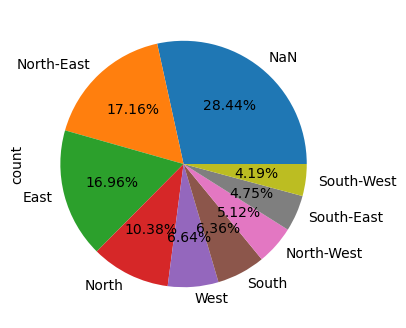

In [1094]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [1095]:
df.drop(columns = ["facing"],inplace = True)

In [1096]:
df.head(2)

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,Undefined,695.0,0,0,0,0,0,1,0
1,sector 78,flat,umang monsoon breeze,1.20,6494.0,3,3,2,8.0,Moderately New Property,2045.0,0,0,0,1,0,2,8


## society

In [1098]:
df.isnull().sum()

sector             0
property_type      0
society            1
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
others             0
pooja room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [1099]:
df[df["society"].isnull()]

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
511,sector 78,flat,NaN,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [1100]:
df.drop(index = 511, inplace = True)

## agePossession

In [1102]:
df.isnull().sum()

sector             0
property_type      0
society            0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
others             0
pooja room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [1103]:
df["agePossession"].value_counts()

agePossession
Relatively new property    1605
New Property                557
Moderately New Property     545
Old Property                293
Undefined                   291
Under Construction          263
Name: count, dtype: int64

In [1104]:
df[df['agePossession'] == 'Undefined']

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
0,sector 95,flat,the roselia 2,0.45,6475.0,2,2,2,19.0,Undefined,695.0,0,0,0,0,0,1,0
5,sector 65,flat,m3m heights,2.15,15003.0,2,2,3+,28.0,Undefined,1433.0,0,0,0,0,0,1,48
16,sector 4,house,independent,1.10,11111.0,3,4,1,2.0,Undefined,990.0,0,0,0,0,0,1,0
45,sector 17,house,independent,3.00,11111.0,4,4,0,1.0,Undefined,3000.0,0,0,0,0,0,1,0
57,sector 105,house,independent,0.70,5833.0,3,2,2,1.0,Undefined,1200.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,sector 67a,flat,aardhya homesh,1.85,8043.0,4,4,0,4.0,Undefined,2556.0,0,0,0,0,0,1,0
3491,sector 13,house,independent,0.62,3588.0,6,6,0,3.0,Undefined,192.0,0,0,0,0,0,1,0
3497,sector 90,flat,shree vardhman flora,0.80,5926.0,2,3,2,0.0,Undefined,1350.0,0,0,0,0,0,1,60
3519,sector 2,house,independent,5.00,15384.0,6,6,2,1.0,Undefined,3611.0,0,0,0,0,0,1,0


In [1105]:
def agePossession_imputation(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[(row["property_type"] == df["property_type"]) & (row["sector"] == df["sector"])][["agePossession"]].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']
        

In [1106]:
df["agePossession"] = df.apply(agePossession_imputation,axis = 1)

In [1107]:
df["agePossession"].value_counts()

agePossession
Relatively new property    1717
New Property                597
Moderately New Property     584
Old Property                326
Under Construction          277
Undefined                    53
Name: count, dtype: int64

In [1108]:
def agePossession_imputation2(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[df["sector"] == row["sector"]]["agePossession"].mode()
        
        if not mode_value.empty:
            return mode_value.iloc[0]   # take the first mode value
        else:
            return np.nan
    else:
        return row['agePossession']


In [1109]:
df["agePossession"] = df.apply(agePossession_imputation2,axis=1)

In [1110]:
df["agePossession"].value_counts()

agePossession
Relatively new property    1726
New Property                598
Moderately New Property     591
Old Property                329
Under Construction          277
Undefined                    33
Name: count, dtype: int64

In [1111]:
def agePossession_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [1112]:
df["agePossession"] = df.apply(agePossession_imputation3,axis=1)

In [1115]:
df["agePossession"].value_counts()

agePossession
Relatively new property    1728
Moderately New Property     622
New Property                598
Old Property                329
Under Construction          277
Name: count, dtype: int64

In [1125]:
df.sample(5)

,sector,property_type,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,others,pooja room,store room,furnishing_type,luxury_score
2905,sector 102,flat,adani oyster greens,1.90,10058.0,3,3,3+,9.0,Relatively new property,2099.0,0,1,0,1,1,1,0
1991,sector 108,flat,sobha city,3.95,16859.0,3,5,2,15.0,New Property,2343.0,1,0,0,0,0,1,118
1390,sector 82,house,vatika independent floors,1.40,8235.0,3,3,2,3.0,New Property,1700.0,0,0,0,1,0,1,61
3309,sector 85,flat,ss,2.10,7468.0,4,4,3,2.0,Relatively new property,2600.0,0,0,0,0,0,1,49
3525,sector 43,house,sushant lok 1 builder floors,6.25,30728.0,7,7,3+,3.0,Moderately New Property,2034.0,1,1,0,0,1,1,46


In [1123]:
df.isnull().sum()

sector             0
property_type      0
society            0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
others             0
pooja room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [1127]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [1129]:
df.shape

(3554, 18)